In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scispy as scis
import seaborn as sns
import anndata as ad
import scvi
import squidpy as sq
import decoupler as dc
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import matplotlib.patches as patches

import warnings
warnings.filterwarnings('ignore')


/data/apps/miniconda3/envs/vizgen/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


>> clustergrammer2 backend version 0.18.0


Global seed set to 0


In [6]:
adc5 = sc.read_h5ad("./outs/adC5.htap.h5ad")
print('adc5 ',adc5.shape)
adp11 = sc.read_h5ad("./outs/adP11.htap.h5ad")
print('adp11 ',adp11.shape)

adc5  (154142, 293)


572 cells to plot
saving P11[x=9900,y=3300].pdf


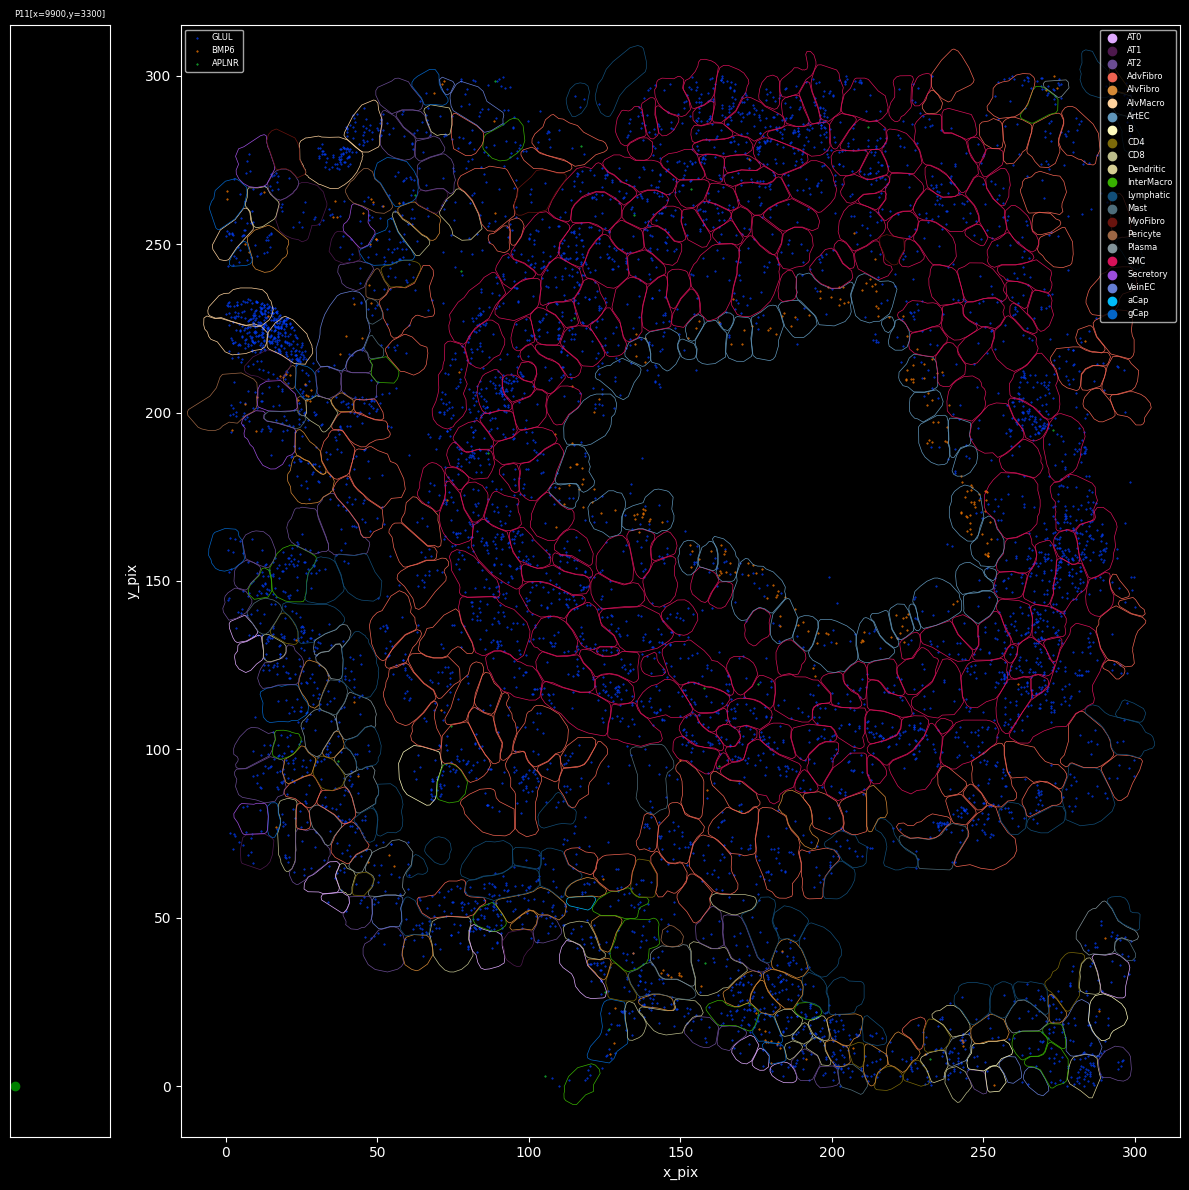

In [11]:
adtmp = scis.pl.view_region(adp11, "celltype", ['GLUL','BMP6','APLNR'], pt_size=0.2, fill_polygons=False,
                       x=9900, y=3300, size_x=300, size_y=300, noimage=True, lw=0.5,
                       #metafilt=metafilt, metafiltvals=metafiltval,
                       save=True, figsize=(12,12), mypal=scis.io.get_palette(color_key='celltype'))

359 cells to plot
saving C5[x=3200,y=6800].pdf


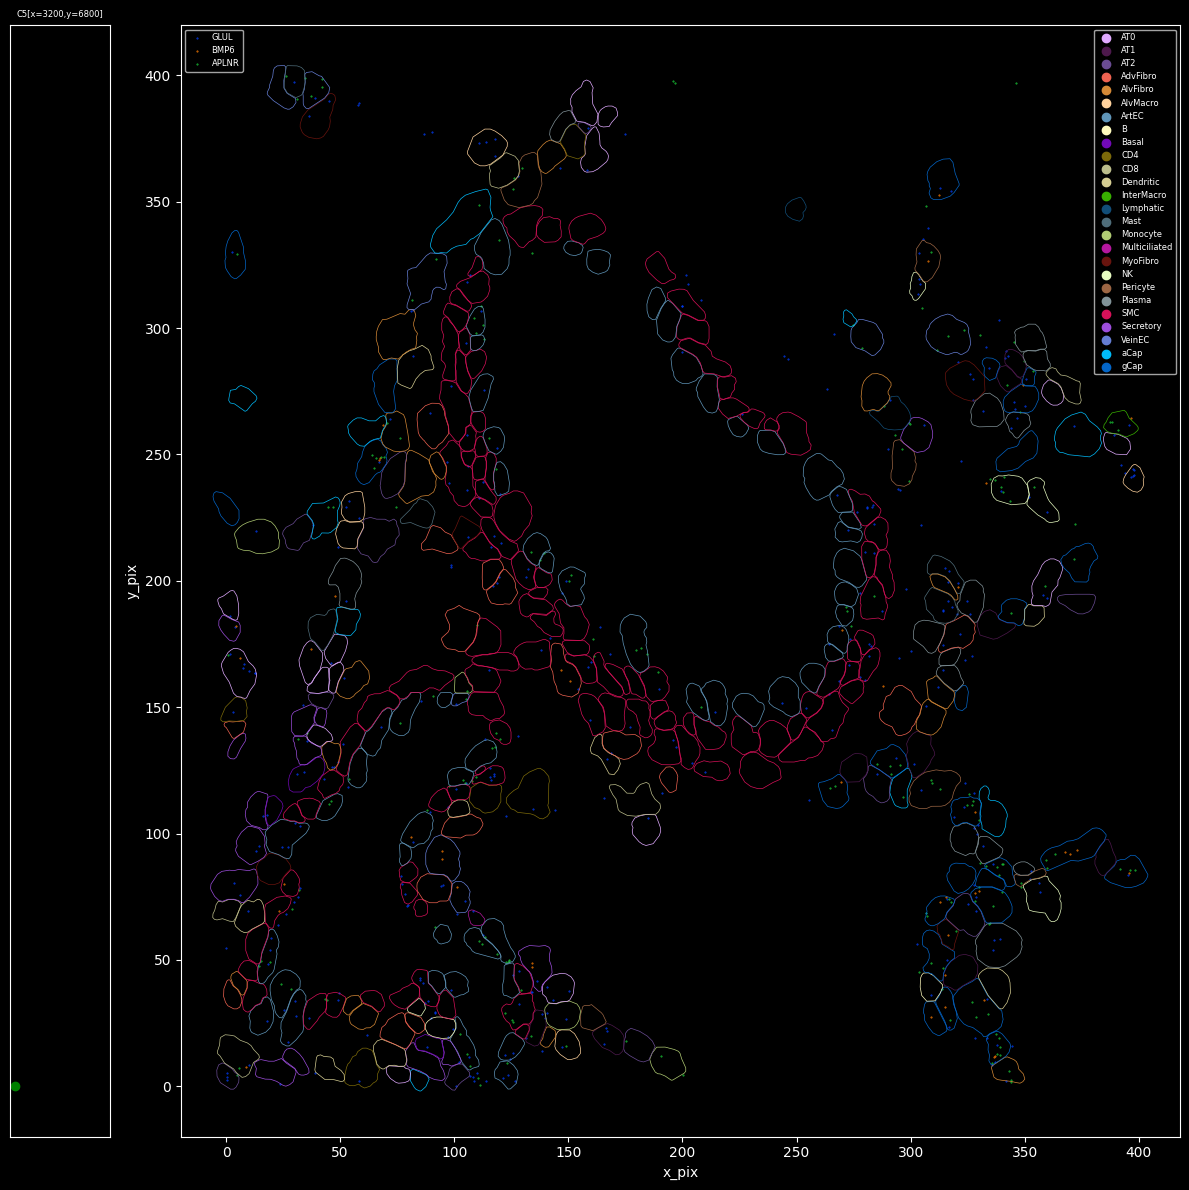

In [7]:
data = {'zone': ['c5a1', 'c5a2', 'c5a3', 'c5a4'],
        'x': [3200, 1400, 4300, 10200],
        'y': [6800, 5400, 6800, 2800],
        'size_x': [400, 400, 400, 400],
        'size_y': [400, 400, 400, 400]}

adtmp = scis.pl.view_region(adc5, "celltype", ['GLUL','BMP6','APLNR'], pt_size=0.2, fill_polygons=False,
                       x=3200, y=6800, size_x=400, size_y=400, noimage=True, lw=0.5, 
                       #metafilt=metafilt, metafiltvals=metafiltval,
                       save=True, figsize=(12,12), mypal=scis.io.get_palette(color_key='celltype'))

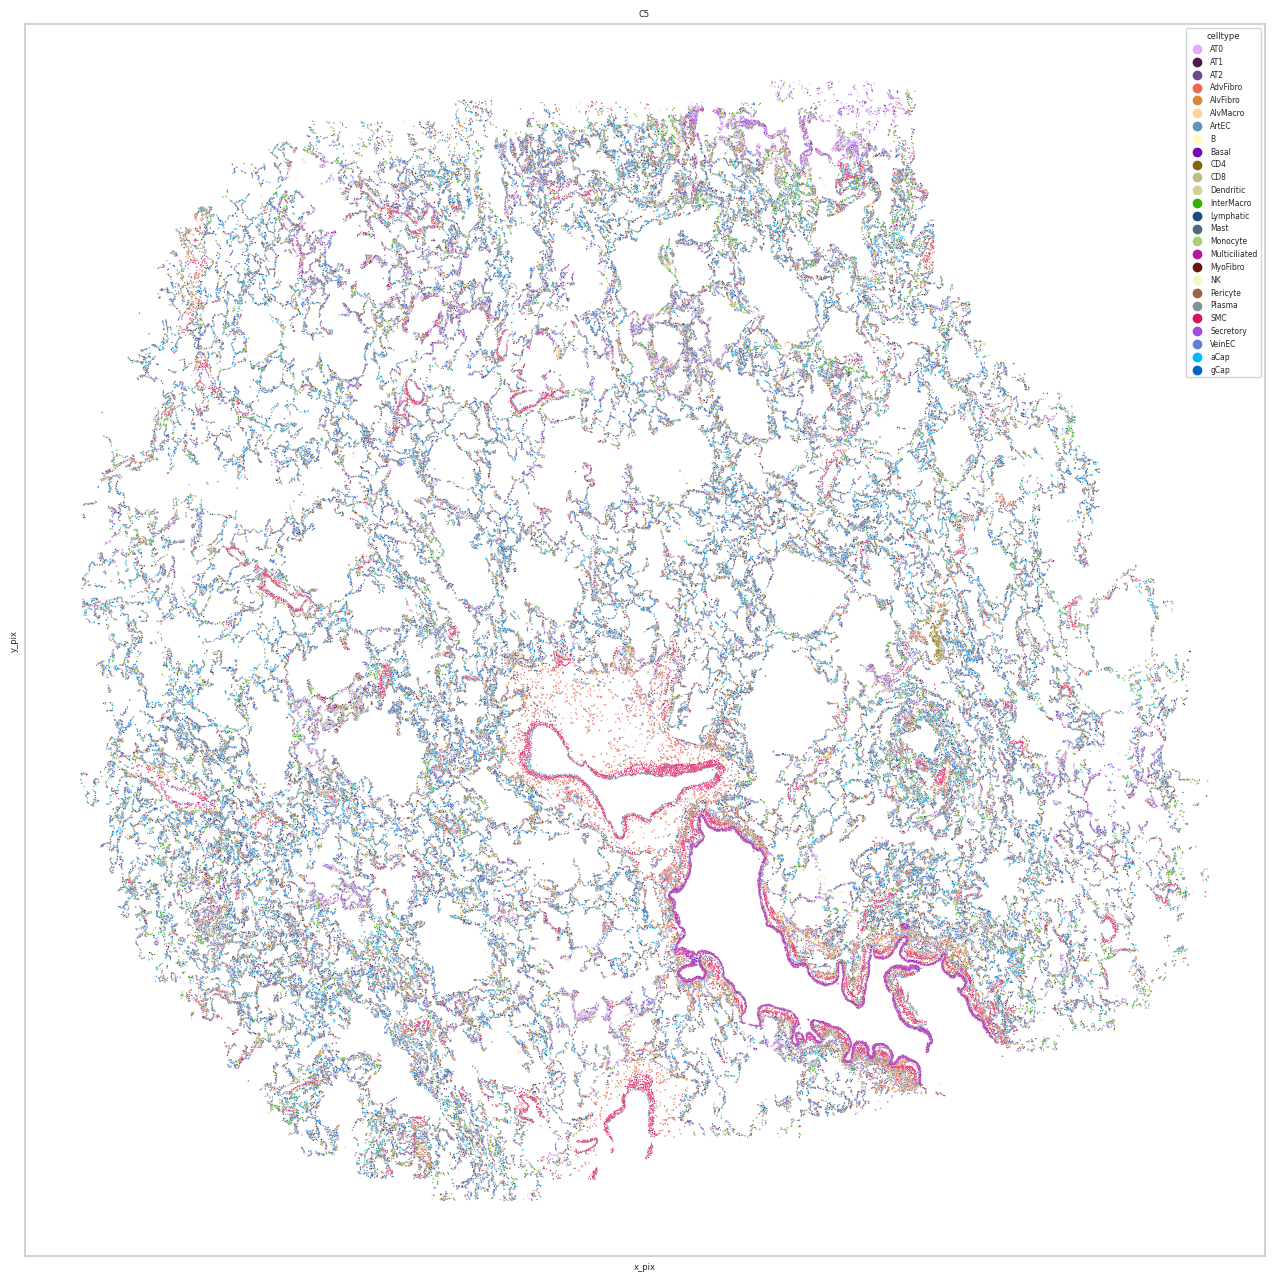

In [7]:
plt.style.context('dark_background')
plt.rcParams['figure.figsize'] = [16, 16]
sns.set()
sns.set(font_scale = 0.5)
sns.set_style("whitegrid")
ax = sns.scatterplot(x='x_pix', y='y_pix', data=adc5.obs, s=1, hue = "celltype", palette=scis.io.get_palette('celltype'))
ax.set_title('C5')
ax.set_xticks(range(0,0,500))
ax.set_yticks(range(0,0,500))
ax.tick_params(axis='x', rotation=90)
ax.figure.savefig('c5_full.png',dpi=120)

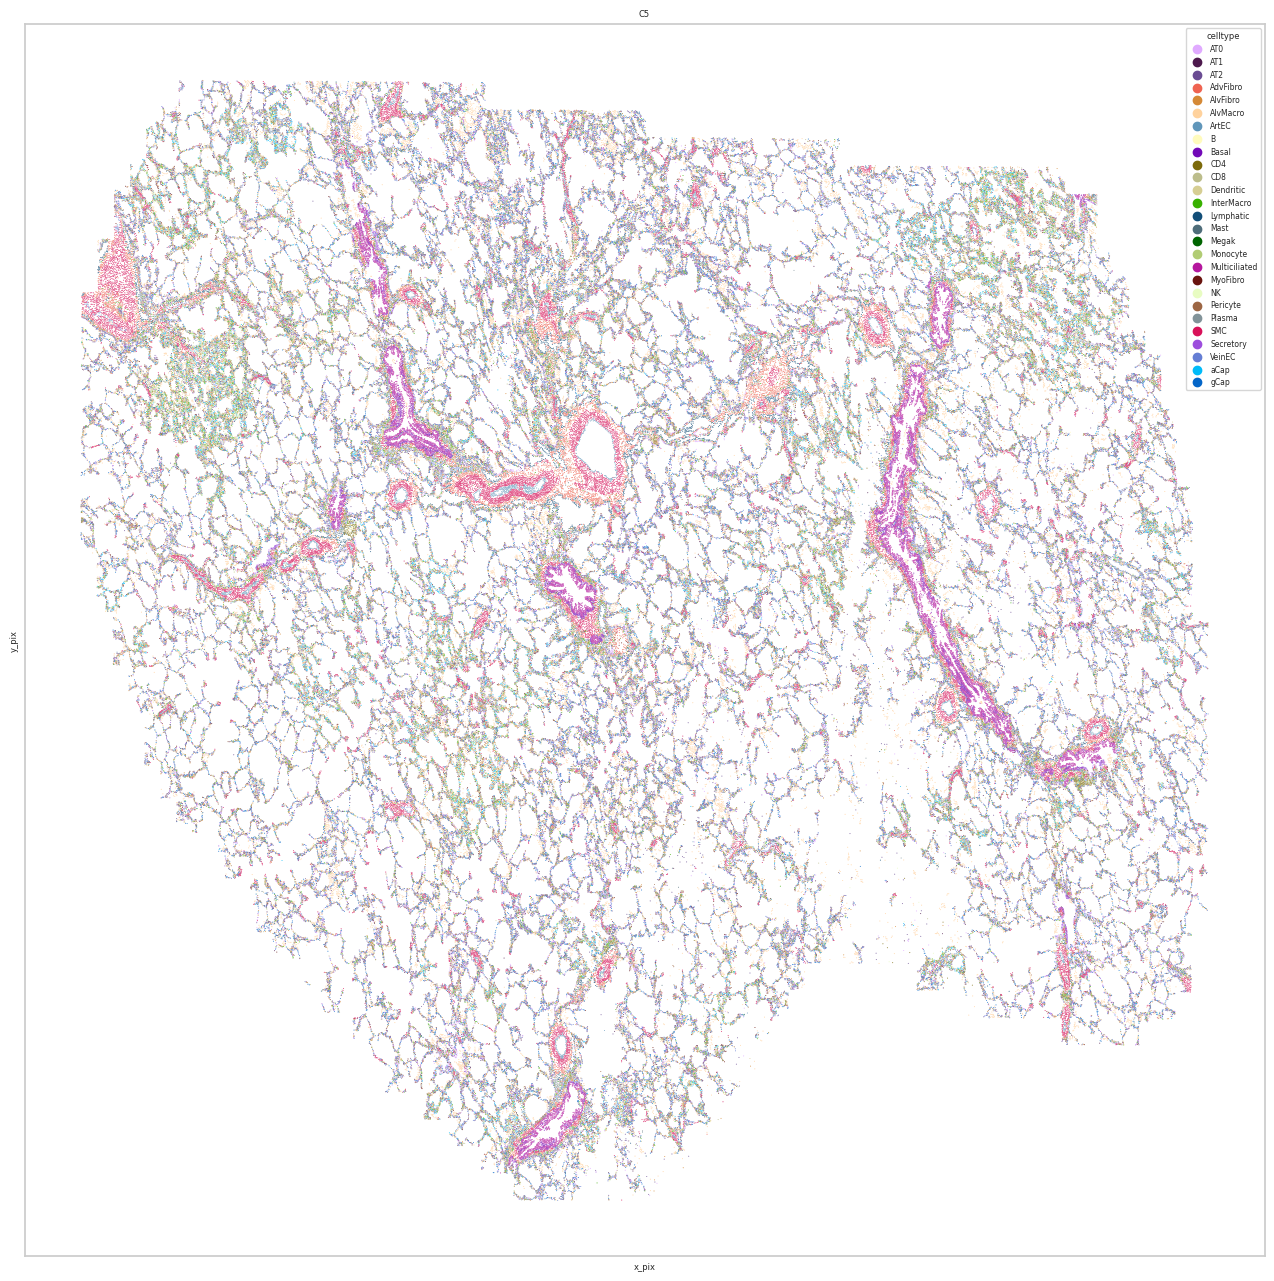

In [9]:
plt.style.context('dark_background')
plt.rcParams['figure.figsize'] = [16, 16]
sns.set()
sns.set(font_scale = 0.5)
sns.set_style("whitegrid")
ax = sns.scatterplot(x='x_pix', y='y_pix', data=adp11.obs, s=0.5, hue = "celltype", palette=scis.io.get_palette('celltype'))
ax.set_title('C5')
ax.set_xticks(range(0,0,500))
ax.set_yticks(range(0,0,500))
ax.tick_params(axis='x', rotation=90)
ax.figure.savefig('p11_full.png',dpi=120)

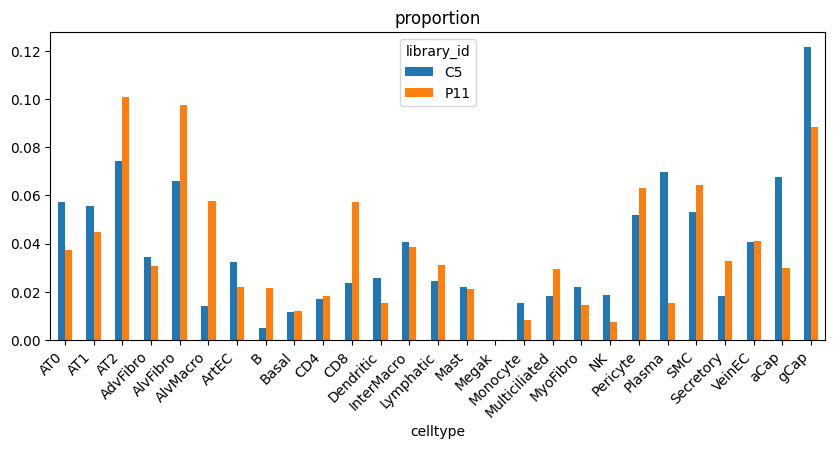

In [30]:
concat = adc5.concatenate(adp11)

plt.rcParams['figure.figsize'] = [10, 4]
# Cell type frequencies
# Now plot the fraction of cell types for each technology
celltypes = concat.obs.loc[:,['library_id','celltype']].copy()
celltype_counts = celltypes.groupby(by=['library_id','celltype']).size().unstack().transpose()
celltype_frac = celltype_counts / celltype_counts.sum(axis=0)
celltype_frac.plot.bar(title='proportion')
plt.xticks(rotation=45, ha='right')
plt.show()

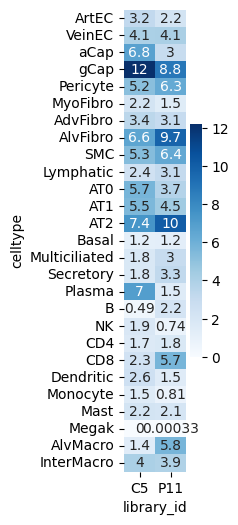

In [41]:
celltype_frac = celltype_frac.fillna(0)
lst = ["ArtEC", "VeinEC", "aCap",'gCap','Pericyte','MyoFibro','AdvFibro','AlvFibro','SMC',
       'Lymphatic','AT0','AT1','AT2','Basal','Multiciliated','Secretory','Plasma','B','NK',
       'CD4','CD8','Dendritic','Monocyte','Mast','Megak','AlvMacro','InterMacro']
df = celltype_frac.loc[lst]

df = df*100

plt.rcParams['figure.figsize'] = [1, 6]
#colormap = sns.color_palette("Reds")
colormap = sns.color_palette("flare", as_cmap=True)
sns.heatmap(df,annot=True,cmap='Blues')
plt.savefig('prop.pdf')


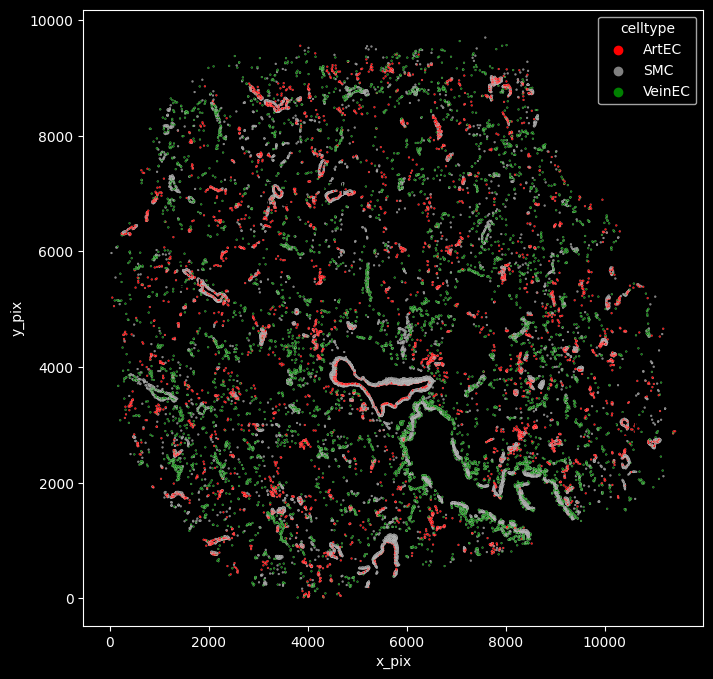

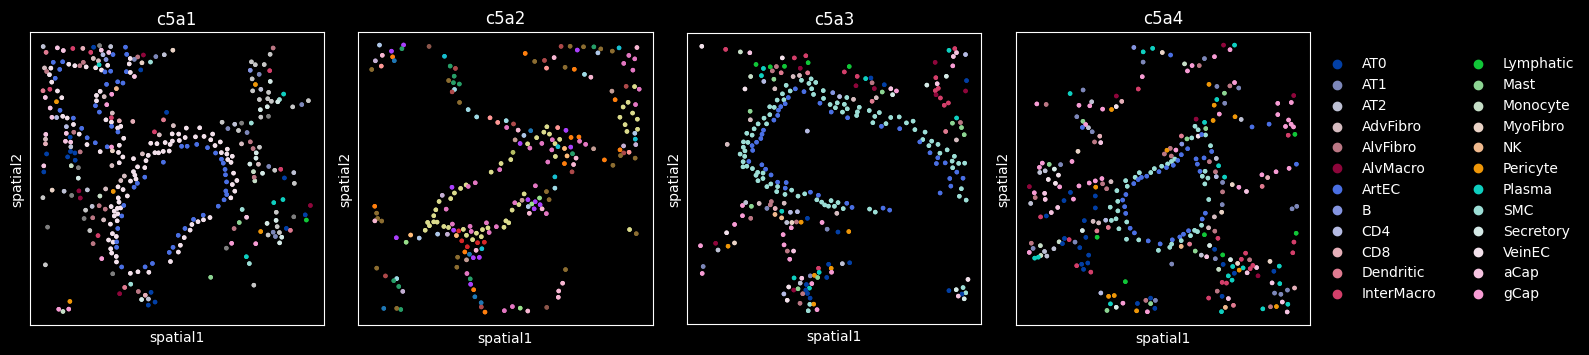

In [8]:
mypal = {"SMC": "grey","ArtEC": "red","VeinEC": "green","Lymph": "blue"}
adtmp = adc5[adc5.obs.celltype.isin(['SMC','ArtEC','VeinEC',"Lymph"])]
plt.rcParams['figure.figsize'] = [8, 8]
ax = sns.scatterplot(x='x_pix', y='y_pix', data=adtmp.obs, s=2, hue = "celltype", palette = mypal)

data = {'zone': ['c5a1', 'c5a2', 'c5a3', 'c5a4'],
        'x': [3200, 1400, 4300, 10200],
        'y': [6800, 5400, 6800, 2800],
        'size_x': [400, 400, 400, 400],
        'size_y': [400, 400, 400, 400]}

df = pd.DataFrame(data)
for index, row in df.iterrows():
    x = row.x
    y = row.y
    size_x = row.size_x
    size_y = row.size_y
    ax.add_patch(patches.Rectangle((x, y), size_x, size_y, ls='--', edgecolor='black', facecolor='none', linewidth=1))

artc5 = scis.pl.get_regions(adc5,df)

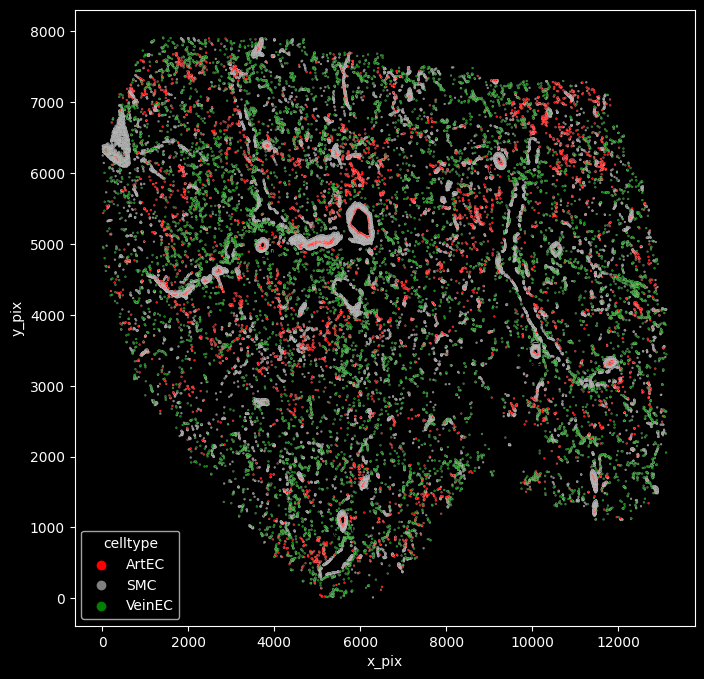

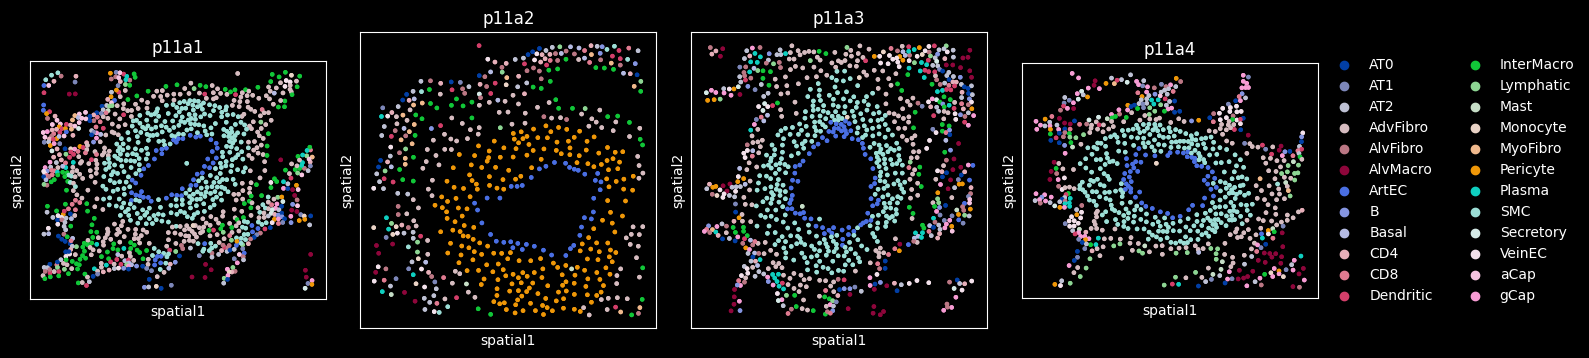

In [9]:
mypal = {"SMC": "grey","ArtEC": "red","VeinEC": "green","Lymph": "blue"}
adtmp = adp11[adp11.obs.celltype.isin(['SMC','ArtEC','VeinEC',"Lymph"])]
plt.rcParams['figure.figsize'] = [8, 8]
ax = sns.scatterplot(x='x_pix', y='y_pix', data=adtmp.obs, s=2, hue = "celltype", palette = mypal)

data = {'zone': ['p11a1', 'p11a2', 'p11a3', 'p11a4'],
        'x': [9000, 9900, 5400, 3500],
        'y': [6000, 3300, 900, 4800],
        'size_x': [500, 300, 400, 450],
        'size_y': [400, 300, 400, 350]}

df = pd.DataFrame(data)
for index, row in df.iterrows():
    x = row.x
    y = row.y
    size_x = row.size_x
    size_y = row.size_y
    ax.add_patch(patches.Rectangle((x, y), size_x, size_y, ls='--', edgecolor='black', facecolor='none', linewidth=1))

artp11 = scis.pl.get_regions(adp11,df)

<Axes: title={'center': 'celltype'}, xlabel='UMAP1', ylabel='UMAP2'>

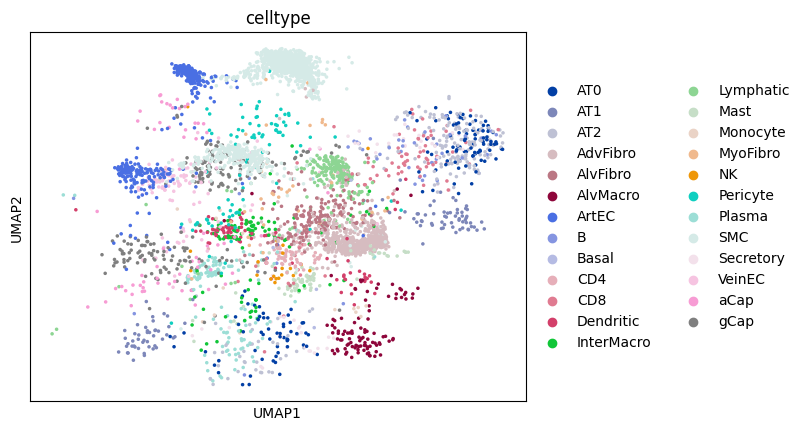

In [57]:
concat = artp11.concatenate(artc5).copy()
sc.pl.embedding(concat, "umap", color='celltype', show=False)

In [21]:
artc5 = artc5[artc5.obs.celltype != "Multiciliated"]

artc5.obs['celltype2'] = artc5.obs['celltype'].astype('category')
artp11.obs['celltype2'] = artp11.obs['celltype'].astype('category')

sq.gr.spatial_neighbors(artc5, coord_type="generic")
sq.gr.nhood_enrichment(artc5, cluster_key="celltype2")

sq.gr.spatial_neighbors(artp11, coord_type="generic")
sq.gr.nhood_enrichment(artp11, cluster_key="celltype2")

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

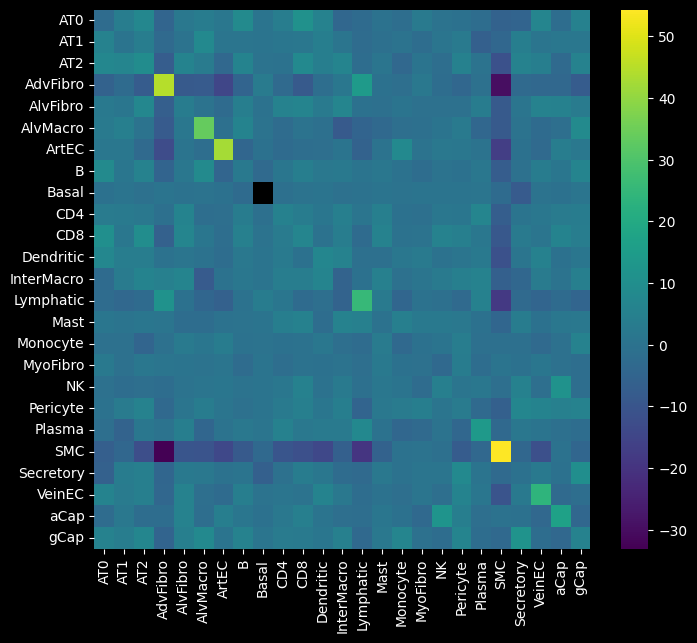

In [30]:
dif = artp11.uns['celltype2_nhood_enrichment']['zscore'] - artc5.uns['celltype2_nhood_enrichment']['zscore']
dif = pd.DataFrame(dif)
dif.columns = artp11.obs.celltype2.cat.categories
dif.index = artc5.obs.celltype2.cat.categories
plt.figure(figsize = (8,7))
ax = sns.heatmap(dif, cmap='viridis')

In [36]:
sq.gr.ligrec(
    artp11,
    n_perms=100,
    cluster_key="celltype2",
)

  0%|          | 0/100 [00:00<?, ?permutation/s]

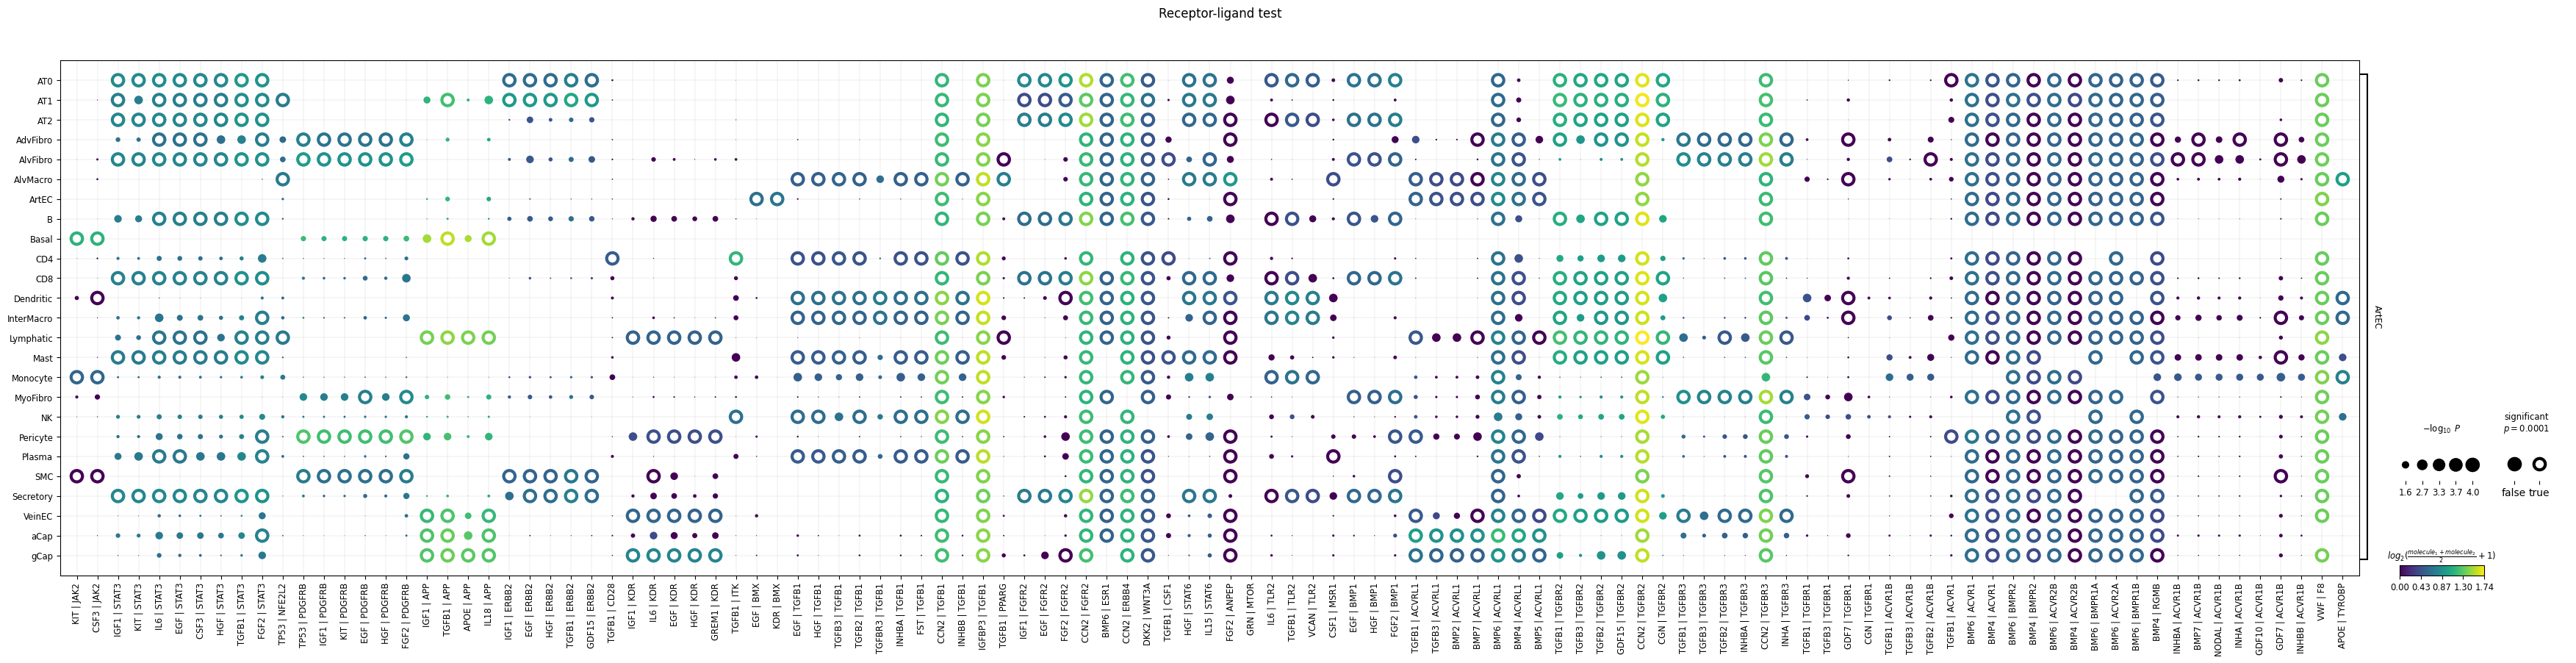

In [71]:
plt.style.use('default')
sq.pl.ligrec(
    artp11,
    cluster_key="celltype2",
    source_groups="ArtEC",
    means_range=(0.3, np.inf),
    alpha=1e-4,
    swap_axes=True,
    save="artp11.LR.pdf",
)

In [62]:
sq.gr.ligrec(
    artc5,
    n_perms=100,
    cluster_key="celltype2",
)

  0%|          | 0/100 [00:00<?, ?permutation/s]

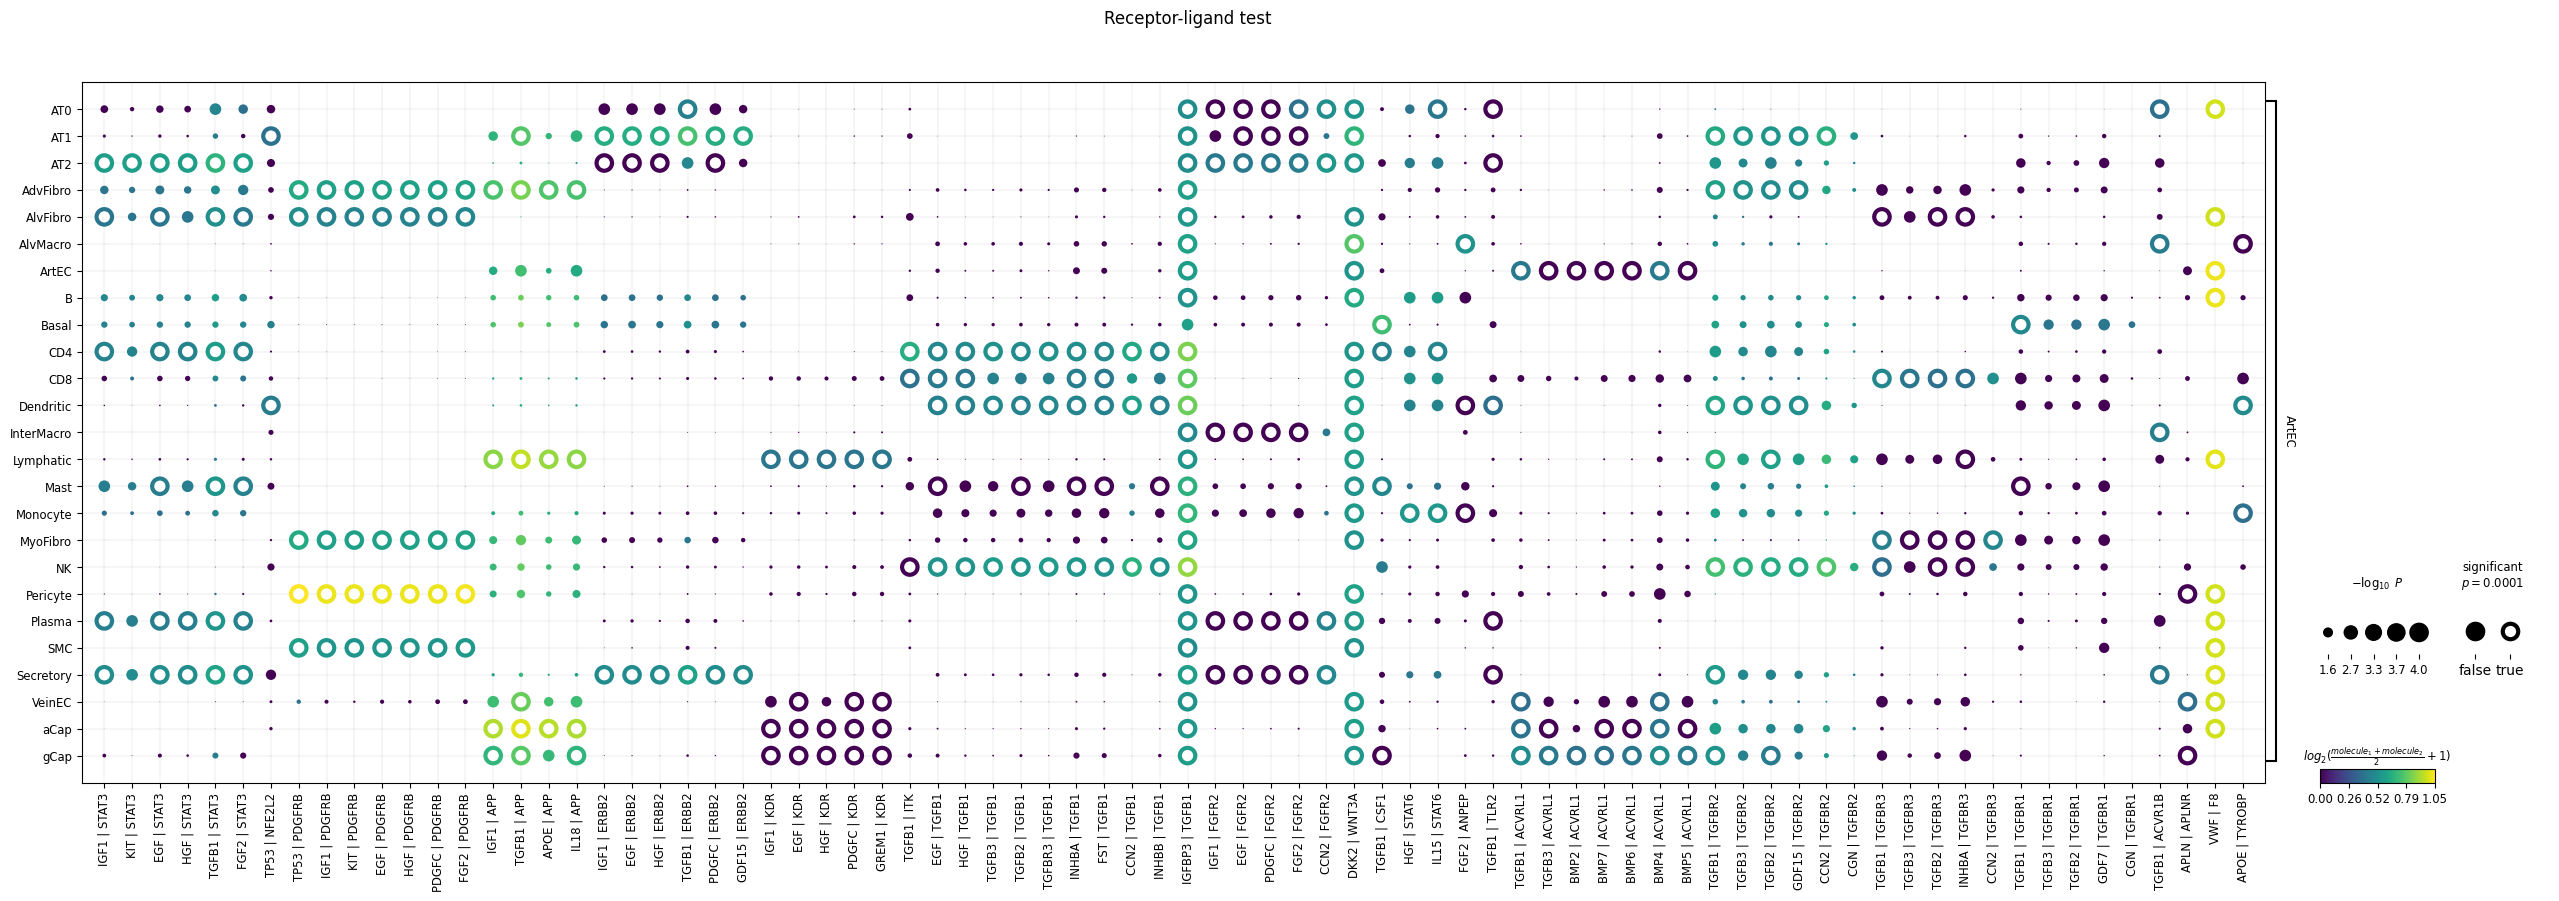

In [69]:
plt.style.use('default')
sq.pl.ligrec(
    artc5,
    cluster_key="celltype2",
    source_groups="ArtEC",
    means_range=(0.3, np.inf),
    alpha=1e-4,
    swap_axes=True,
    save="artc5.LR.pdf",
)
#plt.savefig("artc5.LR.pdf")

In [59]:
smc = concat[concat.obs.celltype == "SMC"]
sc.pl.violin(smc, "GLUL", groupby='zone', show=False, save='violin.pdf')

<Axes: xlabel='zone', ylabel='GLUL'>

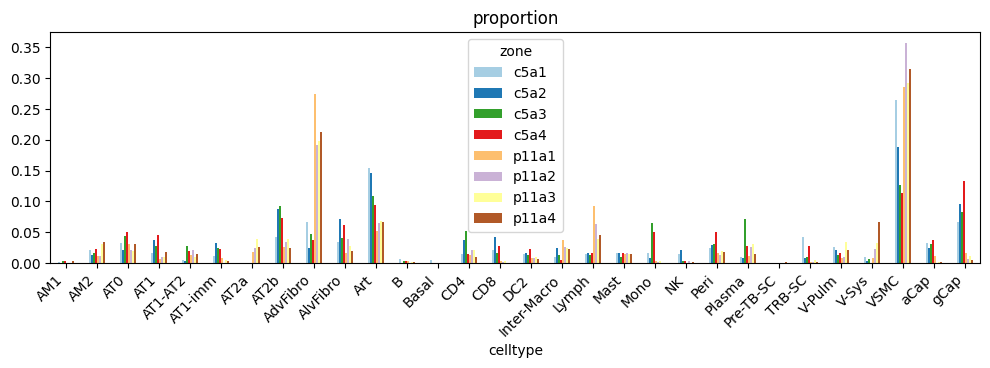

In [104]:
df = concat.obs[['zone','celltype']]

plt.rcParams['figure.figsize'] = [12, 3]
celltype_counts = df.groupby(by=['zone','celltype']).size().unstack().transpose()
celltype_frac = celltype_counts / celltype_counts.sum(axis=0)
celltype_frac.plot.bar(title='proportion', colormap='Paired')
plt.xticks(rotation=45, ha='right')
plt.show()

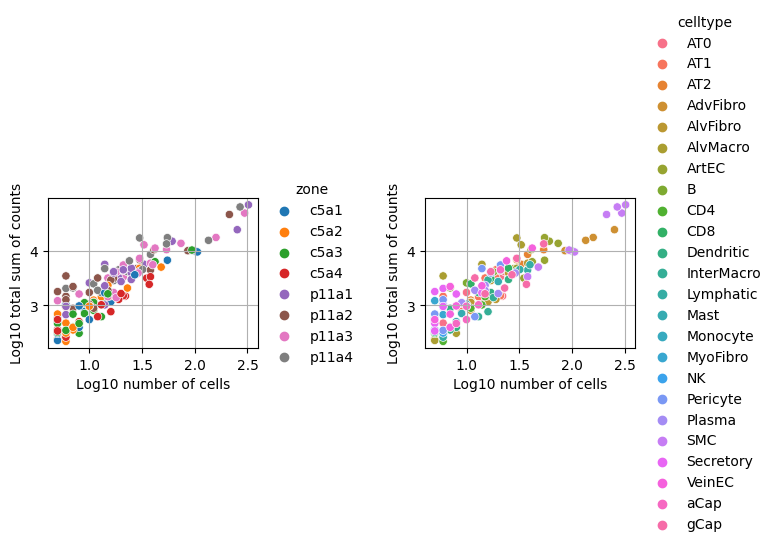

In [9]:
import decoupler as dc
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

# https://decoupler-py.readthedocs.io/en/latest/notebooks/pseudobulk.html

pdata = dc.get_pseudobulk(
    concat,
    sample_col='zone',
    groups_col='celltype',
    layer='counts',
    mode='sum',
    min_cells=5,
    min_counts=200
)
dc.plot_psbulk_samples(pdata, groupby=['zone', 'celltype'], figsize=(8, 4))

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.09 seconds.

Fitting dispersion trend curve...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.08 seconds.

Fitting LFCs...
... done in 0.05 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 0.05 seconds.

Log2 fold change & Wald test p-value: group CTRL vs PAH


baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ACVRL1    64.984543        0.240398  0.149607  1.606864  1.080843e-01   
ADGRG6    35.045467       -0.146851  0.281712 -0.521279  6.021721e-01   
APLNR     17.938381        4.634939  0.534433  8.672636  4.222287e-18   
APP      293.360107       -0.650698  0.147355 -4.415850  1.006139e-05   
AQP1     519.807495        1.025065  0.237033  4.324564  1.528339e-05   
...             ...             ...       ...       ...           ...   
TGFBR2    91.738052       -0.919880  0.309393 -2.973177  2.947341e-03   
TMEM100  140.194824        0.466970  0.190203  2.455119  1.408379e-02   
TXNDC5    17.662287       -2.675965  0.451381 -5.928393  3.059131e-09   
VWF      816.855164       -0.790999  0.111275 -7.108513  1.172999e-12   
YAP1      58.235123        0.299482  0.131992  2.268944  2.327174e-02   

                 padj  
ACVRL1   1.681311e-01  
ADGRG6   6.798717e-01  
APLNR    5.911202e-17  
APP      3.353798e-05  
AQP1     4.862897e-05  
...               ...  
TGFBR2   6.877130e-03  
TMEM100  2.738514e-02  
TXNDC5   1.338370e-08  
VWF      1.026374e-11  
YAP1     3.973223e-02  

[70 rows x 6 columns]

Fitting MAP LFCs...
... done in 0.06 seconds.

Shrunk Log2 fold change & Wald test p-value: group PAH vs CTRL


baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ACVRL1    64.984543       -0.235857  0.148743  1.606864  1.080843e-01   
ADGRG6    35.045467        0.134283  0.276244 -0.521279  6.021721e-01   
APLNR     17.938381       -4.520555  0.525052  8.672636  4.222287e-18   
APP      293.360107        0.637414  0.147027 -4.415850  1.006139e-05   
AQP1     519.807495       -0.978880  0.236285  4.324564  1.528339e-05   
...             ...             ...       ...       ...           ...   
TGFBR2    91.738052        0.850748  0.307448 -2.973177  2.947341e-03   
TMEM100  140.194824       -0.448722  0.188920  2.455119  1.408379e-02   
TXNDC5    17.662287        2.553006  0.440334 -5.928393  3.059131e-09   
VWF      816.855164        0.778228  0.111065 -7.108513  1.172999e-12   
YAP1      58.235123       -0.144270  0.840941  2.268944  2.327174e-02   

                 padj  
ACVRL1   1.681311e-01  
ADGRG6   6.798717e-01  
APLNR    5.911202e-17  
APP      3.353798e-05  
AQP1     4.862897e-05  
...               ...  
TGFBR2   6.877130e-03  
TMEM100  2.738514e-02  
TXNDC5   1.338370e-08  
VWF      1.026374e-11  
YAP1     3.973223e-02  

[70 rows x 6 columns]

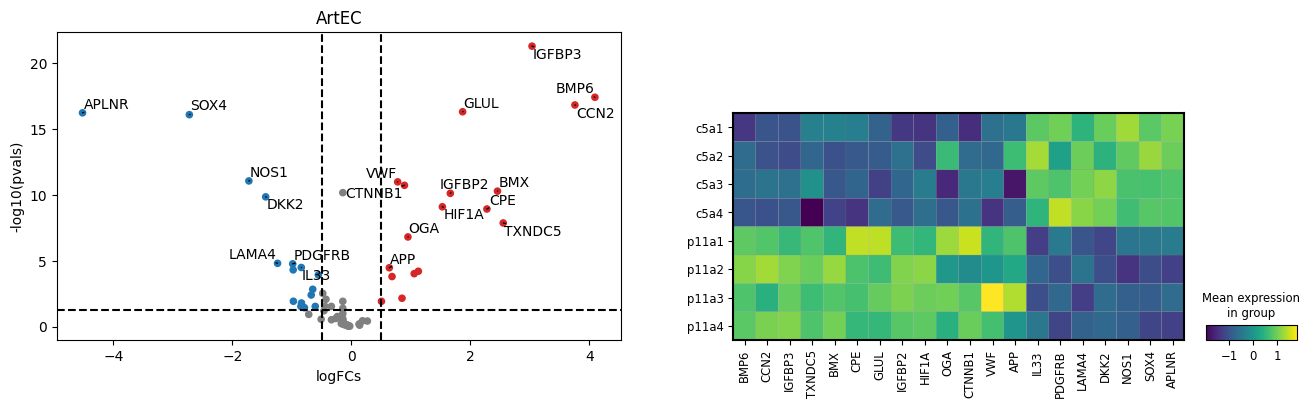

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.12 seconds.

Fitting dispersion trend curve...
... done in 0.06 seconds.

Fitting MAP dispersions...
... done in 0.13 seconds.

Fitting LFCs...
... done in 0.09 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 0.09 seconds.

Log2 fold change & Wald test p-value: group CTRL vs PAH


baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ACVR1    17.585238        0.535022  0.330788  1.617416  1.057885e-01   
ACVR1B   38.342712        0.071062  0.243749  0.291537  7.706403e-01   
ADGRL3   79.226692        0.302476  0.262452  1.152501  2.491151e-01   
ANO1     43.486107        0.232724  0.174987  1.329953  1.835337e-01   
APOE     17.153954        0.577931  0.345962  1.670506  9.481924e-02   
...            ...             ...       ...       ...           ...   
TSPAN8   13.036596       -1.371059  0.458514 -2.990222  2.787749e-03   
TXNDC5   23.600044       -0.650016  0.274741 -2.365922  1.798523e-02   
VCAN     36.972149       -1.276129  0.538251 -2.370879  1.774583e-02   
VWF     173.996094        2.065808  0.355323  5.813890  6.103737e-09   
YAP1    328.891205       -0.593135  0.113853 -5.209669  1.891779e-07   

                padj  
ACVR1   1.624076e-01  
ACVR1B  8.155319e-01  
ADGRL3  3.437158e-01  
ANO1    2.632259e-01  
APOE    1.476471e-01  
...              ...  
TSPAN8  6.201319e-03  
TXNDC5  3.439281e-02  
VCAN    3.439281e-02  
VWF     4.158171e-08  
YAP1    7.364425e-07  

[109 rows x 6 columns]

Fitting MAP LFCs...
... done in 0.08 seconds.

Shrunk Log2 fold change & Wald test p-value: group PAH vs CTRL


baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ACVR1    17.585238       -0.462750  0.329939  1.617416  1.057885e-01   
ACVR1B   38.342712       -0.064141  0.241379  0.291537  7.706403e-01   
ADGRL3   79.226692       -0.272505  0.256999  1.152501  2.491151e-01   
ANO1     43.486107       -0.144270  1.030322  1.329953  1.835337e-01   
APOE     17.153954       -0.496933  0.339314  1.670506  9.481924e-02   
...            ...             ...       ...       ...           ...   
TSPAN8   13.036596        1.190558  0.439009 -2.990222  2.787749e-03   
TXNDC5   23.600044       -0.144270  1.030322 -2.365922  1.798523e-02   
VCAN     36.972149        1.022237  0.529424 -2.370879  1.774583e-02   
VWF     173.996094       -1.966606  0.358095  5.813890  6.103737e-09   
YAP1    328.891205        0.583559  0.113414 -5.209669  1.891779e-07   

                padj  
ACVR1   1.624076e-01  
ACVR1B  8.155319e-01  
ADGRL3  3.437158e-01  
ANO1    2.632259e-01  
APOE    1.476471e-01  
...              ...  
TSPAN8  6.201319e-03  
TXNDC5  3.439281e-02  
VCAN    3.439281e-02  
VWF     4.158171e-08  
YAP1    7.364425e-07  

[109 rows x 6 columns]

<Figure size 800x800 with 0 Axes>

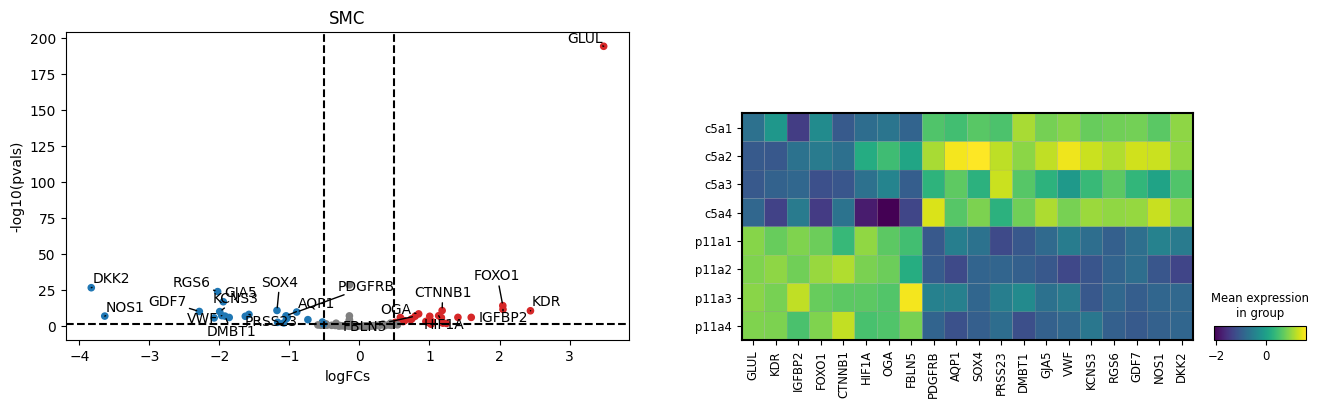

<Figure size 800x800 with 0 Axes>

In [12]:
celltypes = concat.obs['celltype'].cat.categories.tolist()
celltypes = ['ArtEC','SMC']
for ct in celltypes:
    sub = pdata[pdata.obs['celltype'] == ct].copy()

    if(len(sub.obs.group.to_list()) > 1):

        #dc.plot_filter_by_expr(sub, group='group', min_count=10, min_total_count=15)

        # Obtain genes that pass the thresholds
        genes = dc.filter_by_expr(sub, group='group', min_count=20, min_total_count=20)
        # Filter by these genes
        sub = sub[:, genes].copy()

        if(len(sub.obs.group.unique().tolist()) > 1):

            # Build DESeq2 object
            dds = DeseqDataSet(
                adata=sub,
                design_factors='group',
                ref_level=['group', 'CTRL'],
                refit_cooks=True,
                n_cpus=8,
            )
            dds.deseq2()
            stat_res = DeseqStats(dds, contrast=["group", 'CTRL', 'PAH'], n_cpus=8)

            stat_res.summary()
            stat_res.lfc_shrink(coeff='group_PAH_vs_CTRL')

            results_df = stat_res.results_df
            #results_df

            fig, axs = plt.subplots(1, 2, figsize=(16,4))
            dc.plot_volcano_df(results_df, x='log2FoldChange', y='padj', ax=axs[0], top=20)
            axs[0].set_title(ct)
            
            # sign_thr=0.05, lFCs_thr=0.5
            results_df['pvals'] = -np.log10(results_df['padj'])
            results_df.to_csv("decoupler/artery_" + ct + ".csv")

            up_msk = (results_df['log2FoldChange'] >= 0.5) & (results_df['pvals'] >= -np.log10(0.05))
            dw_msk = (results_df['log2FoldChange'] <= -0.5) & (results_df['pvals'] >= -np.log10(0.05))
            signs = results_df[up_msk | dw_msk].sort_values('pvals', ascending=False)
            signs = signs.iloc[:20]
            #print("LOOK HERE\n\n" , signs)

            signs = signs.sort_values('log2FoldChange', ascending=False)

            if(len(signs.index.tolist()) > 0):
                sc.pp.normalize_total(sub)
                sc.pp.log1p(sub)
                sc.pp.scale(sub, max_value=10)
                sc.pl.matrixplot(sub,signs.index, groupby='zone', ax=axs[1])

            plt.tight_layout()
            fig.savefig("decoupler/artery_" + ct + ".pdf", bbox_inches='tight')
